In [13]:
# !jupyter nbconvert --to script task_2_all.ipynb

[NbConvertApp] Converting notebook task_2_all.ipynb to script
[NbConvertApp] Writing 3300 bytes to task_2_all.py


In [1]:
## ryoung - full NMIST dataset for learning
#advance requierements
##  - running this notebooks takes a long time

# http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [2]:
# !pip install seaborn

In [3]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
# https://www.openml.org/d/554
mnist = fetch_openml('mnist_784' ,cache=True)
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [5]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))


Size of the dataframe: (70000, 786)


In [6]:
# need to reduce the dems to a smaller number t-sne doesn't like large dems
# pca 100 dimensional 

In [7]:
N = 5500 ## about 80% of the 70K of data
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
pca_100 = PCA(n_components=100)

# this runs it on the whole data set
# pca_result_25 = pca_25.fit_transform(df)

# this just runs on N values above
#full data set
# pca_result_100 = pca_100.fit_transform(df)
#n data set
pca_result_100 = pca_100.fit_transform(data_subset)



# using a 100 dim because it accounts for 93% of the variability in the data  ( down from ~720+ dim)

# 25 dimensions ~ .765% var. - trying a 50 
# 50 dimensions ~ .865% var. - trying a 100 
# 100 dimensions ~ .92% var. - trying a 250 
# 250 dimensions ~ .98% var. 
print('Cumulative explained variation for 100 principal components: {}'.format(np.sum(pca_100.explained_variance_ratio_)))

Cumulative explained variation for 100 principal components: 0.9146559899668085


In [9]:
time.strftime('%X %x %Z')

'17:35:08 02/07/20 Pacific Standard Time'

In [10]:
# for final home work I am running it on n=56(10mins) / for testing I do n 10K (~2 minute run time)
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# this takes time - i did testing on 1000 
time_start = time.time()
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=60.0, #the perplexity is related to the number of nearest neighbors that is used in learning
            n_iter=500, # default is 1000
            learning_rate=250.0)
tsne_pca_results = tsne.fit_transform(pca_result_100)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 52000 samples in 2.071s...
[t-SNE] Computed neighbors for 52000 samples in 937.912s...
[t-SNE] Computed conditional probabilities for sample 1000 / 52000
[t-SNE] Computed conditional probabilities for sample 2000 / 52000
[t-SNE] Computed conditional probabilities for sample 3000 / 52000
[t-SNE] Computed conditional probabilities for sample 4000 / 52000
[t-SNE] Computed conditional probabilities for sample 5000 / 52000
[t-SNE] Computed conditional probabilities for sample 6000 / 52000
[t-SNE] Computed conditional probabilities for sample 7000 / 52000
[t-SNE] Computed conditional probabilities for sample 8000 / 52000
[t-SNE] Computed conditional probabilities for sample 9000 / 52000
[t-SNE] Computed conditional probabilities for sample 10000 / 52000
[t-SNE] Computed conditional probabilities for sample 11000 / 52000
[t-SNE] Computed conditional probabilities for sample 12000 / 52000
[t-SNE] Computed conditional probabilities for 

In [11]:
time.strftime('%X %x %Z')

'17:53:58 02/07/20 Pacific Standard Time'

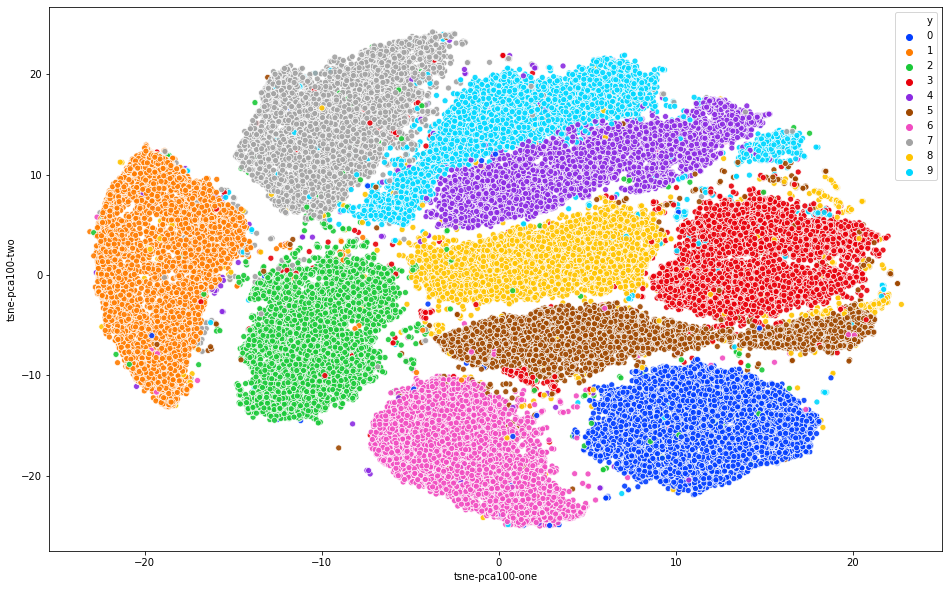

In [12]:
df_subset['tsne-pca100-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca100-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-pca100-one", y="tsne-pca100-two",
    hue="y",
    palette=sns.color_palette("bright", 10),
    data=df_subset,
    legend="full",
    alpha=0.9,

)